In [1]:
import sys
import os

# Get the path to the project root dynamically
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

In [2]:
from app.models.database import db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stockDataCollection = db['stockData']
stockHistoryPriceCollection = db['stockHistoryPrice']

<Axes: title={'center': 'SPY Adj Close Price'}, xlabel='date'>

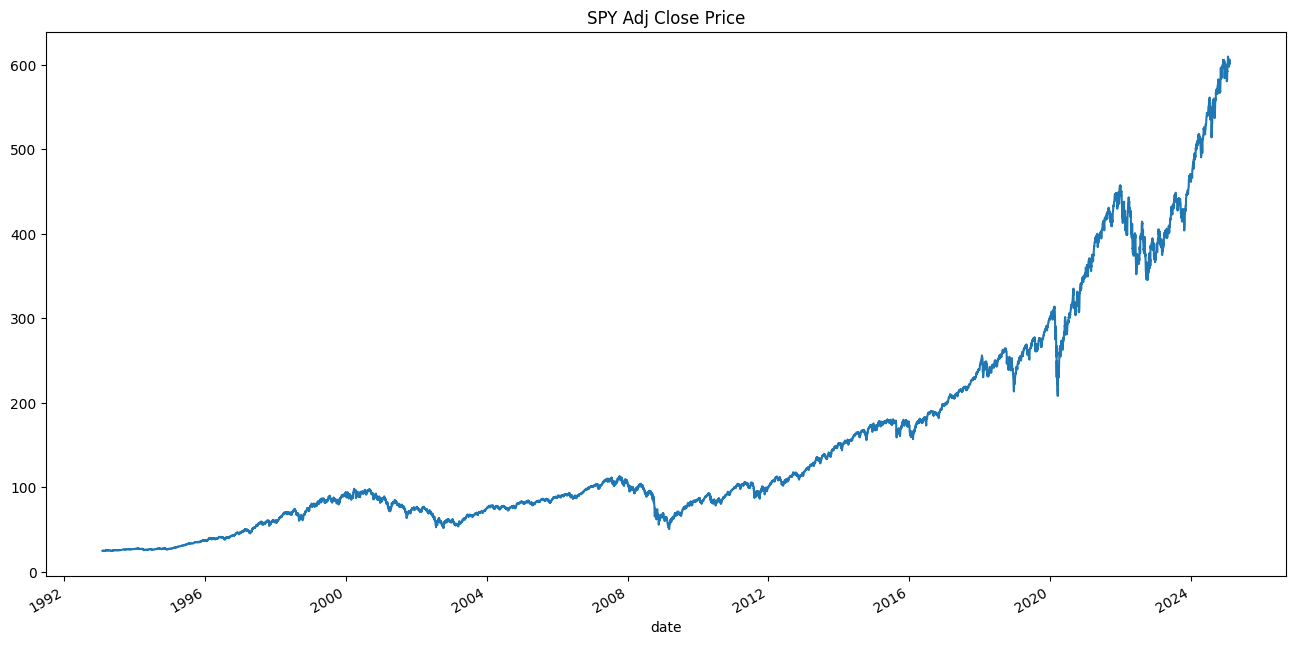

In [3]:
SPY = pd.DataFrame(stockHistoryPriceCollection.find({'symbol': 'SPY'}))
SPY.index = pd.to_datetime(SPY['date'])
SPY = SPY.drop(columns="date")
SPY["adjclose"].plot(figsize=(16, 8), title="SPY Adj Close Price")

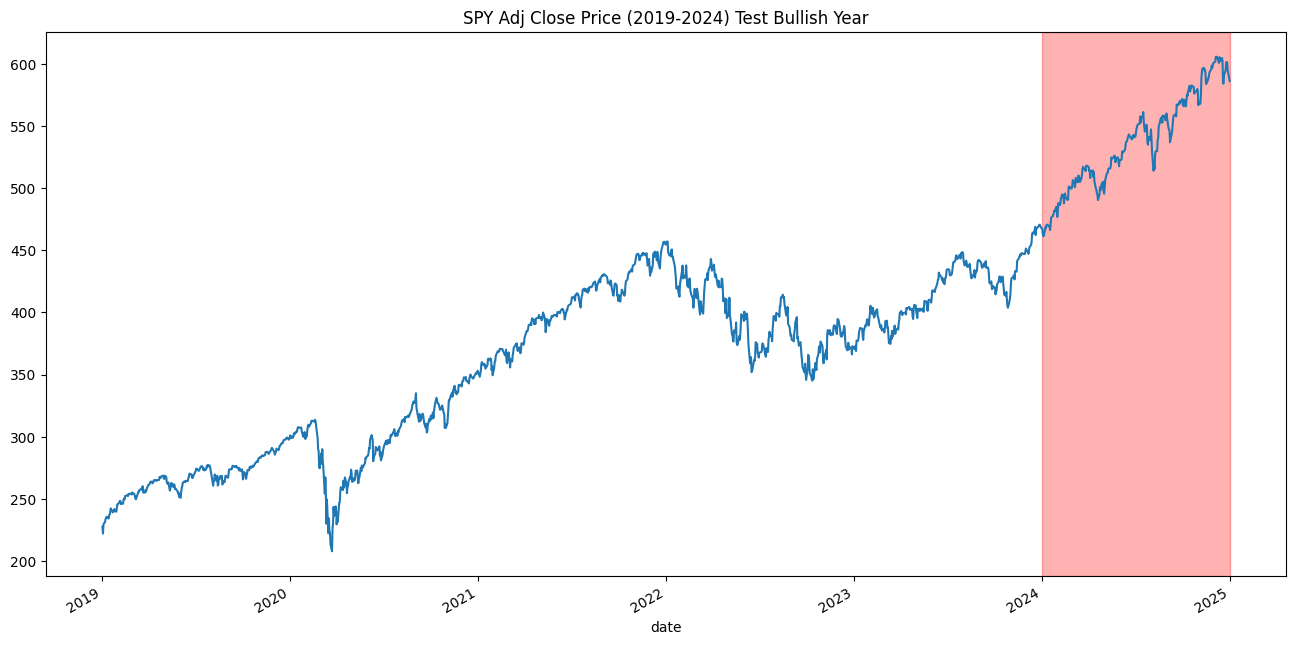

In [4]:
ax = SPY.loc['2019':'2024', 'adjclose'].plot(figsize=(16, 8), title="SPY Adj Close Price (2019-2024) Test Bullish Year")
ax.axvspan('2024-01-01', '2024-12-31', color='red', alpha=0.3)

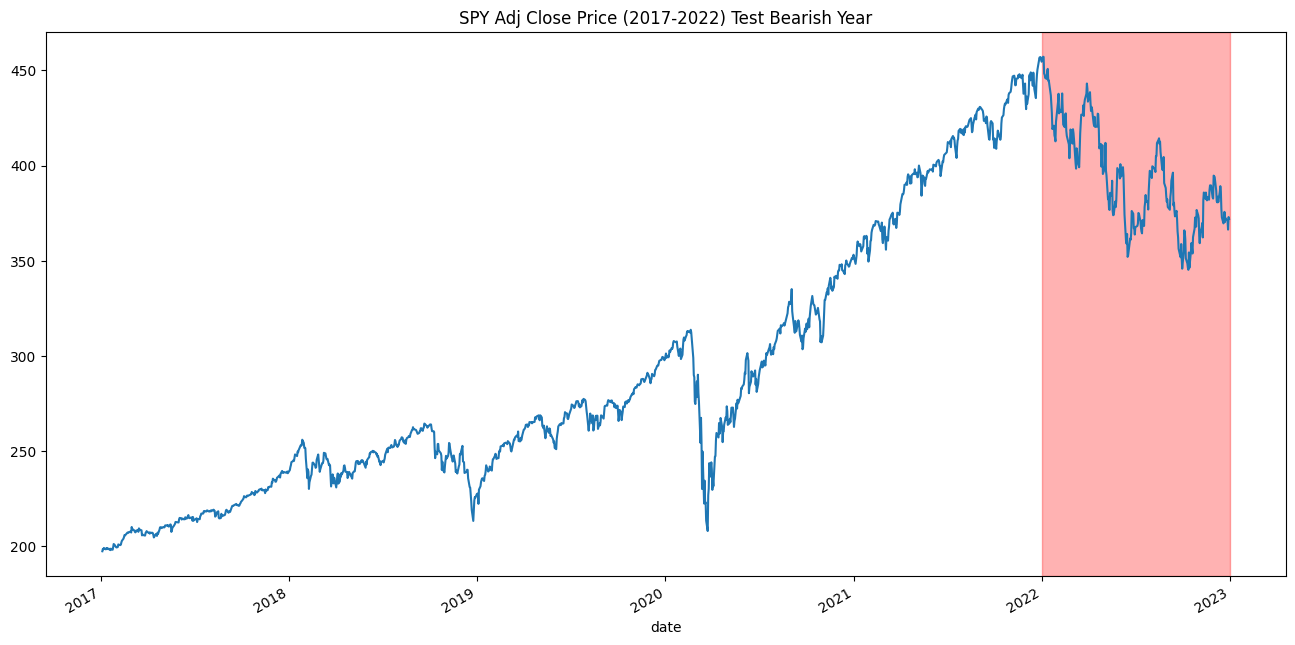

In [5]:
ax = SPY.loc['2017':'2022', 'adjclose'].plot(figsize=(16, 8), title="SPY Adj Close Price (2017-2022) Test Bearish Year")
ax.axvspan('2022-01-01', '2022-12-31', color='red', alpha=0.3)

In [6]:
# startDate, endDate = "2017-01-01", "2025-01-01"
# startDate = datetime.strptime(startDate, "%Y-%m-%d")
# endDate = datetime.strptime(endDate, "%Y-%m-%d")

# market_caps = {}
# batch_size = 50

# for i, ticker in enumerate(tickers):
#     attempts = 0
#     success = False
#     while attempts < 5 and not success:
#         try:
#             stock = yf.Ticker(ticker)
#             hist = stock.history(start=startDate, end=endDate, interval="1d")
#             shares_outstanding = stock.info.get("sharesOutstanding", None)
#             if shares_outstanding:
#                 market_caps[ticker] = hist["Close"] * shares_outstanding
#             success = True
#         except Exception as e:
#             attempts += 1
#             print(f"Error fetching data for {ticker}. Attempt {attempts}/5.")
#             print(f"Error: {e}")
#             if attempts < 5:
#                 print("Retrying in 60 seconds...")
#                 time.sleep(60)
#             else:
#                 # market_caps[ticker] = f"Failed to retrieve data after {attempts} attempts."
#                 print(f"Failed to fetch data for {ticker} after {attempts} attempts.")

#     # After processing a batch of 50 tickers, save the data to CSV
#     if (i + 1) % batch_size == 0 or i == len(tickers) - 1:
#         df = pd.DataFrame(market_caps)
#         df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d %H:%M:%S')
#         df.to_csv(f"./data/market_caps_batch_{i // batch_size + 1}.csv")
#         print(f"Batch {i // batch_size + 1} saved to CSV.")
#         market_caps.clear()  # Clear the market_caps to avoid re-adding old data

In [7]:
# filePaths = "./data/"
# files = [f for f in os.listdir(filePaths) if f.endswith(".csv")]
# files

# Data = pd.DataFrame({})

# for file in files:
#     df = pd.read_csv(filePaths + file)
#     df.index = pd.to_datetime(df['Date'])
#     df = df.drop(columns="Date")
#     Data = pd.concat([Data, df], axis=1)

# Data.head()
# Data.to_csv("market_caps.csv")

In [8]:
# from app.services.OptimizeService import OptimizeService
# from app.services.PortfolioService import PortfolioService
# from app.schemas.investorView import investorView, investorViewInput
# from app.utils.helper import *
# import yfinance as yf
# from datetime import datetime
# from tqdm import tqdm
# import time
# import concurrent.futures

# oService = OptimizeService()
# pService = PortfolioService()

# class PerformanceTest:   
#     def __init__(self, startDate, endDate, riskFreeRate: float = 0.03):
#         self.startDate = datetime.strptime(startDate, "%Y-%m-%d")
#         self.endDate = datetime.strptime(endDate, "%Y-%m-%d")
#         self.riskFreeRate = riskFreeRate
        
#     def getStockList(self, ):
#         existMarketCapSymbol = list(pd.read_csv("market_caps.csv", index_col=0).columns)
#         query = {}
#         query['dataCollectedDays'] = {'$gt': 7 * 252 + 30}
#         query['symbol'] = {'$in': existMarketCapSymbol}
        
#         stockList = np.array([x["symbol"] for x in list(stockDataCollection.find(query, {'symbol': 1}))])
#         return stockList
        
#     def calculateAnnReturn(self, recent_prices: pd.DataFrame):
#         annualReturn = (recent_prices.iloc[-1] / recent_prices.iloc[0]) ** (252/len(recent_prices)) - 1
#         return annualReturn
    
#     def getSymbolHistoryPrice(self, symbols):
#         query = {
#             'symbol': {'$in': symbols},
#             'date': {'$gte': self.startDate, '$lte': self.endDate},
#         }
#         df = pd.DataFrame(db["stockHistoryPrice"].find(query))
#         df = df[['date', 'symbol', 'adjclose']]
#         df_pivot = df.pivot(index='date', columns='symbol', values='adjclose')
#         df_pivot = df_pivot.sort_index()
#         df_pivot.index = pd.to_datetime(df_pivot.index).strftime('%Y-%m-%d %H:%M:%S')
#         return df_pivot
    
#     def splitData(self, df: pd.DataFrame, testDays: int = 252):
#         trainData = df.iloc[:-testDays]
#         testData = df.iloc[-testDays:]
#         return trainData, testData 
    
#     def getPriorReturn(self, marketCap, covMatrix, sharpeRatio: float = 0.5):
#         return pService.getPriorReturns(marketCap, covMatrix, sharpeRatio)
    
#     def getVariables(self, df: pd.DataFrame, marketCap: np.ndarray):
#         dfReturn = df.pct_change(fill_method=None).dropna()
#         returns = self.calculateAnnReturn(df)
#         covMatrix = dfReturn.cov() * 252
#         priorReturns = self.getPriorReturn(marketCap, covMatrix)
#         return returns.values, covMatrix.values, priorReturns
    
#     def getHistoricalVariable(self, df: pd.DataFrame, weight):
#         portfolio = df.dot(weight).dropna()
#         historicalReturn = portfolio.iloc[-1] / portfolio.iloc[0] - 1
#         portfolioReturn = portfolio.pct_change().dropna()
#         historicalVolatility = np.std(portfolioReturn) * np.sqrt(252)
#         historicalSharpeRatio = (historicalReturn - self.riskFreeRate) / historicalVolatility
#         return historicalReturn, historicalVolatility, historicalSharpeRatio
    
#     def flow(self, numberOfIterations: int = 1000, minNumberOfStock: int = 5, maxNumberOfStock: int = 10):
#         results_data = []
        
#         marketCap = pd.read_csv("market_caps.csv", index_col=0)
#         marketCap.index = pd.to_datetime(marketCap.index).strftime('%Y-%m-%d %H:%M:%S')
        
#         stockList = self.getStockList()
        
#         i = 0
#         while i < numberOfIterations:
#             # Pick a number of Stock
#             numberOfStock = np.random.randint(minNumberOfStock, maxNumberOfStock)
#             # Sample a number of Stocks
#             stocks = np.random.choice(stockList, numberOfStock, replace=False).tolist()
#             # Get a Df and a Variable 
#             df = self.getSymbolHistoryPrice(stocks)
#             dfTrain, dfTest = self.splitData(df)
#             lastDayMarketCap = marketCap[stocks].loc[dfTrain.index[-1]].values            
#             trainAnnReturns, trainCovMatrix, trainpriorReturns = self.getVariables(dfTrain, lastDayMarketCap)
#             testAnnReturns, testCovMatrix, testpriorReturns = self.getVariables(dfTest, lastDayMarketCap)
            
#             while (trainAnnReturns < self.riskFreeRate).all():
#                 stocks = np.random.choice(stockList, numberOfStock, replace=False).tolist()
#                 df = self.getSymbolHistoryPrice(stocks)
#                 dfTrain, dfTest = self.splitData(df)
#                 trainAnnReturns, trainCovMatrix, trainpriorReturns = self.getVariables(dfTrain, lastDayMarketCap)
#                 testAnnReturns, testCovMatrix, testpriorReturns = self.getVariables(dfTest, lastDayMarketCap)

#             # Random pick n stocks to predict 
#             # Create an investor's View base on testAnnReturn
#             oneCorrectView = []
#             twoCorrectView = []
#             correctPredictStock = np.random.choice(stocks, 1, replace=False).tolist()
#             for stock in correctPredictStock:
#                 oneCorrectView.append(
#                     investorViewInput(
#                         asset1=stock,
#                         percentage=testAnnReturns[stocks.index(stock)] * 100,
#                         confidence=99
#                     )
#                 )
#             oneCorrectView = convertInvestorView(oneCorrectView, stocks, max([a[idx] for idx, a in enumerate(trainCovMatrix)]))
#             correctPredictStock = np.random.choice(stocks, 2, replace=False).tolist()
#             for stock in correctPredictStock:
#                 twoCorrectView.append(
#                     investorViewInput(
#                         asset1=stock,
#                         percentage=testAnnReturns[stocks.index(stock)] * 100,
#                         confidence=90
#                     )
#                 )
#             twoCorrectView = convertInvestorView(twoCorrectView, stocks, max([a[idx] for idx, a in enumerate(trainCovMatrix)]))
            
#             posteriorReturnOne, posteriorCovMatrixOne = pService.getPosteriorVariables(
#                 P=oneCorrectView.P,
#                 Q=oneCorrectView.Q,
#                 Omega=oneCorrectView.Omega,
#                 priorReturns=trainpriorReturns,
#                 covMatrix=trainCovMatrix
#             )
#             posteriorReturnTwo, posteriorCovMatrixTwo = pService.getPosteriorVariables(
#                 P=twoCorrectView.P,
#                 Q=twoCorrectView.Q,
#                 Omega=twoCorrectView.Omega,
#                 priorReturns=trainpriorReturns,
#                 covMatrix=trainCovMatrix
#             )
            
#             # Get a Weight Optimize
#             equalWeight = np.ones(numberOfStock)/numberOfStock
#             marketWeight = lastDayMarketCap / sum(lastDayMarketCap)
            
#             try:
#                 meanVarWeight = oService.optimizeSharpeRatio(trainAnnReturns, trainCovMatrix, self.riskFreeRate)
#                 priorWeight = oService.optimizeSharpeRatio(trainpriorReturns, trainCovMatrix, self.riskFreeRate)
#                 posteriorWeightOne = oService.optimizeSharpeRatio(posteriorReturnOne, posteriorCovMatrixOne, self.riskFreeRate)
#                 posteriorWeightTwo = oService.optimizeSharpeRatio(posteriorReturnTwo, posteriorCovMatrixTwo, self.riskFreeRate)
#             except:
#                 continue
            
#             # Calculate a Return, Volatility, SharpeRatio
#             equalReturn, equalVolatility, equalShartpeRatio = self.getHistoricalVariable(dfTest, equalWeight)
#             marketReturn, marketVolatility, marketSharpeRatio = self.getHistoricalVariable(dfTest, marketWeight)
#             meanVarReturn, meanVarVolatility, meanVarSharpeRatio = self.getHistoricalVariable(dfTest, meanVarWeight)
#             priorReturn, priorVolatility, priorSharpeRatio = self.getHistoricalVariable(dfTest, priorWeight)
#             posteriorReturnOne, posteriorVolatilityOne, posteriorSharpeRatioOne = self.getHistoricalVariable(dfTest, posteriorWeightOne)
#             posteriorReturnTwo, posteriorVolatilityTwo, posteriorSharpeRatioTwo = self.getHistoricalVariable(dfTest, posteriorWeightTwo)
            
#             i += 1
            
#             # Save 
#             results_data.append({
#                 "iteration": i,
#                 "symbols": ", ".join(stocks),
#                 "EqualWeight": equalWeight.tolist(),
#                 "EqualReturn": equalReturn,
#                 "EqualVolatility": equalVolatility,
#                 "EqualSharpeRatio": equalShartpeRatio,
#                 "MarketWeight": marketWeight.tolist(),
#                 "MarketReturn": marketReturn,
#                 "MarketVolatility": marketVolatility,
#                 "MarketSharpeRatio": marketSharpeRatio,
#                 "MeanVarWeight": meanVarWeight,
#                 "MeanVarReturn": meanVarReturn,
#                 "MeanVarVolatility": meanVarVolatility,
#                 "MeanVarSharpeRatio": meanVarSharpeRatio,
#                 "PriorWeight": priorWeight,
#                 "PriorReturn": priorReturn,
#                 "PriorVolatility": priorVolatility,
#                 "PriorSharpeRatio": priorSharpeRatio,
#                 "PosteriorWeightOne": posteriorWeightOne,
#                 "PosteriorReturnOne": posteriorReturnOne,
#                 "PosteriorVolatilityOne": posteriorVolatilityOne,
#                 "PosteriorSharpeRatioOne": posteriorSharpeRatioOne,
#                 "PosteriorWeightTwo": posteriorWeightTwo,
#                 "PosteriorReturnTwo": posteriorReturnTwo,
#                 "PosteriorVolatilityTwo": posteriorVolatilityTwo,
#                 "PosteriorSharpeRatioTwo": posteriorSharpeRatioTwo
#             })
        
#         results_df = pd.DataFrame(results_data)
#         results_df = results_df.set_index('iteration')
#         return results_df
    
#     def flowAdjustMonthly(self, numberOfIterations: int = 1000, minNumberOfStock: int = 5, maxNumberOfStock: int = 10):
#         results_data = []
        
#         marketCap = pd.read_csv("market_caps.csv", index_col=0)
#         marketCap.index = pd.to_datetime(marketCap.index).strftime('%Y-%m-%d %H:%M:%S')
        
#         stockList = self.getStockList()
        
#         i = 0
#         while i < numberOfIterations:
#             numberOfStock = np.random.randint(minNumberOfStock, maxNumberOfStock)
#             # Sample a number of Stocks
#             stocks = np.random.choice(stockList, numberOfStock, replace=False).tolist()
#             # Do it monthly
#             df = self.getSymbolHistoryPrice(stocks)
#             for numberOfMonth in range(12):
#                 dfTrain, dfTest = self.splitData(df, 252 - numberOfMonth * 21)
#                 print(len(dfTrain), len(dfTest))
            
#             i += 1

In [9]:
from app.services.OptimizeService import OptimizeService
from app.services.PortfolioService import PortfolioService
from app.schemas.investorView import investorView, investorViewInput
from app.utils.helper import *
import yfinance as yf
from datetime import datetime
from tqdm import tqdm
import time
import concurrent.futures

oService = OptimizeService()
pService = PortfolioService()

class PerformanceTest:   
    def __init__(self, startDate, endDate, initialValue: int = 1_000_000, riskFreeRate: float = 0.03):
        self.startDate = datetime.strptime(startDate, "%Y-%m-%d")
        self.endDate = datetime.strptime(endDate, "%Y-%m-%d")
        self.initialValue = initialValue
        self.riskFreeRate = riskFreeRate
        
    def getStockList(self, ):
        existMarketCapSymbol = list(pd.read_csv("market_caps.csv", index_col=0).columns)
        query = {}
        query['dataCollectedDays'] = {'$gt': 8 * 252}
        query['symbol'] = {'$in': existMarketCapSymbol}
        query['marketCap'] = {'$gt': 1_000_000_000}
        query["annual5YrsReturn"] = {"$gt": 0.05} 
        
        stockList = np.array([x["symbol"] for x in list(stockDataCollection.find(query, {'symbol': 1}))])
        return stockList
        
    def calculateAnnReturn(self, recent_prices: pd.DataFrame):
        annualReturn = (recent_prices.iloc[-1] / recent_prices.iloc[0]) ** (252/len(recent_prices)) - 1
        return annualReturn
    
    def getSymbolHistoryPrice(self, symbols):
        query = {
            'symbol': {'$in': symbols},
            'date': {'$gte': self.startDate, '$lte': self.endDate},
        }
        df = pd.DataFrame(db["stockHistoryPrice"].find(query))
        df = df[['date', 'symbol', 'adjclose']]
        df_pivot = df.pivot(index='date', columns='symbol', values='adjclose')
        df_pivot = df_pivot.sort_index()
        df_pivot.index = pd.to_datetime(df_pivot.index).strftime('%Y-%m-%d %H:%M:%S')
        return df_pivot
    
    def splitData(self, df: pd.DataFrame, testDays: int = 252):
        trainData = df.iloc[:-testDays]
        testData = df.iloc[-testDays:]
        return trainData, testData 
    
    def getPriorReturn(self, marketCap, covMatrix, sharpeRatio: float = 0.5):
        return pService.getPriorReturns(marketCap, covMatrix, sharpeRatio)
    
    def getVariables(self, df: pd.DataFrame, marketCap: np.ndarray):
        dfReturn = df.pct_change(fill_method=None).dropna()
        returns = self.calculateAnnReturn(df)
        covMatrix = dfReturn.cov() * 252
        priorReturns = self.getPriorReturn(marketCap, covMatrix)
        return returns.values, covMatrix.values, priorReturns
    
    def getHistoricalVariable(self, df: pd.DataFrame, weight):
        portfolio = df.dot(weight).dropna()
        historicalReturn = portfolio.iloc[-1] / portfolio.iloc[0] - 1
        portfolioReturn = portfolio.pct_change().dropna()
        historicalVolatility = np.std(portfolioReturn) * np.sqrt(252)
        historicalSharpeRatio = (historicalReturn - self.riskFreeRate) / historicalVolatility
        return historicalReturn, historicalVolatility, historicalSharpeRatio
    
    def flow(self, numberOfIterations: int = 1000, minNumberOfStock: int = 5, maxNumberOfStock: int = 10):
        results_data = []
        
        marketCap = pd.read_csv("market_caps.csv", index_col=0)
        marketCap.index = pd.to_datetime(marketCap.index).strftime('%Y-%m-%d %H:%M:%S')
        
        stockList = self.getStockList()
        
        i = 0
        while i < numberOfIterations:
            # Pick a number of Stock
            numberOfStock = np.random.randint(minNumberOfStock, maxNumberOfStock)
            
            # Sample a number of Stocks
            stocks = np.random.choice(stockList, numberOfStock, replace=False).tolist()
            
            # Get a Df and a Variable 
            df = self.getSymbolHistoryPrice(stocks)
            dfTrain, dfTest = self.splitData(df)
            lastDayMarketCap = marketCap[stocks].loc[dfTrain.index[-1]].values            
            trainAnnReturns, trainCovMatrix, trainpriorReturns = self.getVariables(dfTrain, lastDayMarketCap)
            testAnnReturns, testCovMatrix, testpriorReturns = self.getVariables(dfTest, lastDayMarketCap)
            
            while (trainAnnReturns < self.riskFreeRate).all():
                stocks = np.random.choice(stockList, numberOfStock, replace=False).tolist()
                df = self.getSymbolHistoryPrice(stocks)
                dfTrain, dfTest = self.splitData(df)
                trainAnnReturns, trainCovMatrix, trainpriorReturns = self.getVariables(dfTrain, lastDayMarketCap)
                testAnnReturns, testCovMatrix, testpriorReturns = self.getVariables(dfTest, lastDayMarketCap)

            # Random pick n stocks to predict correctly
            # Create an investor's View base on testAnnReturn
            oneCorrectView = []
            correctPredictStock = np.random.choice(stocks, 1, replace=False).tolist()
            for stock in correctPredictStock:
                oneCorrectView.append(
                    investorViewInput(
                        asset1=stock,
                        percentage=testAnnReturns[stocks.index(stock)] * 100,
                        confidence=99
                    )
                )
            oneCorrectView = convertInvestorView(oneCorrectView, stocks, max([a[idx] for idx, a in enumerate(trainCovMatrix)]))
            posteriorReturnOne, posteriorCovMatrixOne = pService.getPosteriorVariables(
                P=oneCorrectView.P,
                Q=oneCorrectView.Q,
                Omega=oneCorrectView.Omega,
                priorReturns=trainpriorReturns,
                covMatrix=trainCovMatrix
            )
            
            # Get a Weight Optimize
            try:
                equalWeight = np.ones(numberOfStock)/numberOfStock
                marketWeight = lastDayMarketCap / sum(lastDayMarketCap)
                meanVarWeight = oService.optimizeSharpeRatio(trainAnnReturns, trainCovMatrix, self.riskFreeRate)
                priorWeight = oService.optimizeSharpeRatio(trainpriorReturns, trainCovMatrix, self.riskFreeRate)
                posteriorWeightOne = oService.optimizeSharpeRatio(posteriorReturnOne, posteriorCovMatrixOne, self.riskFreeRate)
            except:
                continue
            
            # Calculate a Return, Volatility, SharpeRatio
            equalReturn, equalVolatility, equalShartpeRatio = self.getHistoricalVariable(dfTest, equalWeight)
            marketReturn, marketVolatility, marketSharpeRatio = self.getHistoricalVariable(dfTest, marketWeight)
            meanVarReturn, meanVarVolatility, meanVarSharpeRatio = self.getHistoricalVariable(dfTest, meanVarWeight)
            priorReturn, priorVolatility, priorSharpeRatio = self.getHistoricalVariable(dfTest, priorWeight)
            posteriorReturnOne, posteriorVolatilityOne, posteriorSharpeRatioOne = self.getHistoricalVariable(dfTest, posteriorWeightOne)
            
            i += 1
            
            # Save 
            results_data.append({
                "iteration": i,
                "symbols": ", ".join(stocks),
                "EqualSharpeRatio": equalShartpeRatio,
                "MarketSharpeRatio": marketSharpeRatio,
                "MeanVarSharpeRatio": meanVarSharpeRatio,
                "PriorSharpeRatio": priorSharpeRatio,
                "PosteriorSharpeRatioOne": posteriorSharpeRatioOne,
            })
        
        results_df = pd.DataFrame(results_data)
        results_df = results_df.set_index('iteration')
        return results_df

In [10]:
tickers = ["AAPL", "AMZN", "MSFT", "TSLA", "NVDA"]

startDate, endDate = "2017-01-01", "2024-12-31"
test = PerformanceTest(startDate, endDate)
df = test.getSymbolHistoryPrice(tickers)
marketCap = pd.read_csv("market_caps.csv", index_col=0)
marketCap.index = pd.to_datetime(marketCap.index).strftime('%Y-%m-%d %H:%M:%S')

TrainDays = 5 * 252
TestDays = 4 * 21

df = df[-(TrainDays + 3 * TestDays):] 
for i in range(3):
    print(f"Step: {i}")
    dfTrain = df[i * TestDays : TrainDays + i * TestDays]
    annReturns, covMatrix, priorReturns = test.getVariables(dfTrain, marketCap[tickers].loc[dfTrain.index[-1]].values)
    meanWeight = oService.optimizeSharpeRatio(annReturns, covMatrix, 0.02)
    priorWeight = oService.optimizeSharpeRatio(priorReturns, covMatrix, 0.02)
    print("Mean-Variance Weight:", meanWeight)
    print("Prior Weight:", priorWeight)

Step: 0
Mean-Variance Weight: [0.33774, 0.0, 0.0, 0.5463, 0.11596]
Prior Weight: [0.29693, 0.15682, 0.24417, 0.14378, 0.1583]
Step: 1
Mean-Variance Weight: [0.0, 0.0, 0.0, 0.85434, 0.14566]
Prior Weight: [0.2233, 0.17674, 0.23819, 0.11159, 0.25018]
Step: 2
Mean-Variance Weight: [0.0, 0.0, 0.0, 0.88194, 0.11806]
Prior Weight: [0.26168, 0.13799, 0.19262, 0.10751, 0.3002]


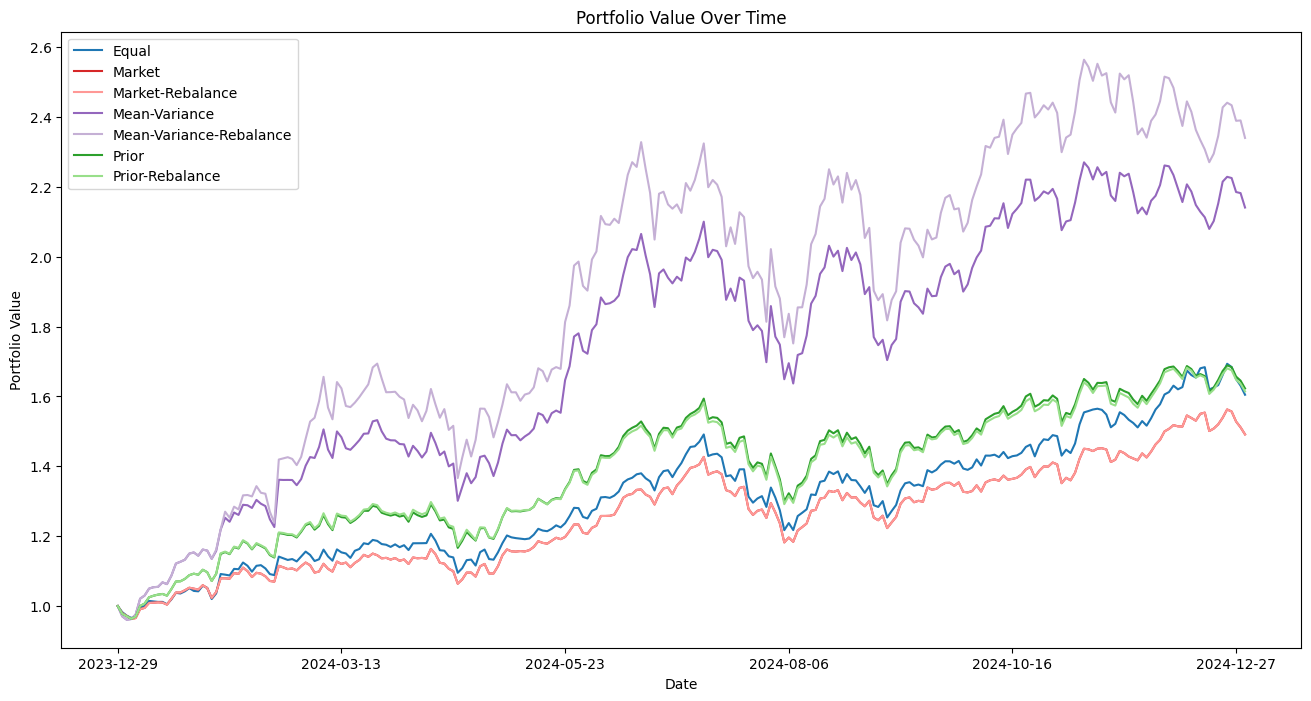

In [11]:
def simulateRebalance(
    tickers, 
    startDate="2017-01-01", 
    endDate="2025-01-01", 
    riskFreeRate=0.02,
    numRebalances=12, 
    trainDays=1260, 
    TestDays=252, 
    initialValue=1_000_000
    ):
    # Load data
    bullTest = PerformanceTest(
        startDate=startDate, 
        endDate=endDate,
        riskFreeRate=riskFreeRate
    )
    df = bullTest.getSymbolHistoryPrice(tickers)
    marketCap = pd.read_csv("market_caps.csv", index_col=0)
    marketCap.index = pd.to_datetime(marketCap.index).strftime('%Y-%m-%d %H:%M:%S')

    # Define constants
    testDays = TestDays // numRebalances
    df = df[-(trainDays + numRebalances * testDays):]
    dfAllTest = df[-(1 + numRebalances * testDays):]

    # Initialize portfolio tracking
    dfPortfolio = pd.DataFrame(index=dfAllTest.index, columns=[
        "Equal", "Market", "Market-Rebalance", "Mean-Variance", "Mean-Variance-Rebalance", "Prior", "Prior-Rebalance"
    ])
    dfPortfolio.iloc[0] = initialValue

    # Initialize holding matrices
    holdings = {
        "Equal": np.zeros((numRebalances, len(tickers))),
        "Market": np.zeros((numRebalances, len(tickers))),
        "Mean-Variance": np.zeros((numRebalances, len(tickers))),
        "Prior": np.zeros((numRebalances, len(tickers)))
    }
    adjustmentDates = []

    for i in range(numRebalances):
        dfTrain = df[i * testDays : trainDays + i * testDays]
        dfTest = df[trainDays + i * testDays : trainDays + (i + 1) * testDays]
        lastDay = dfTrain.index[-1]
        lastDayMarketCap = marketCap.loc[lastDay, tickers].values
        adjustmentDates.append(lastDay)

        # Compute optimization variables
        annReturns, covMatrix, priorReturns = test.getVariables(dfTrain, lastDayMarketCap)
        equalWeights = np.ones(len(tickers)) / len(tickers)
        marketWeights = lastDayMarketCap / lastDayMarketCap.sum()
        meanWeights = np.array(oService.optimizeSharpeRatio(annReturns, covMatrix, 0.03))
        priorWeights = np.array(oService.optimizeSharpeRatio(priorReturns, covMatrix, 0.03))

        # Compute initial holdings
        if i == 0:
            for strategy, weights in zip(holdings.keys(), [equalWeights, marketWeights, meanWeights, priorWeights]):
                holdings[strategy][i] = (initialValue * weights) / dfTrain.loc[lastDay, tickers]
                dfPortfolio.loc[dfAllTest.index, strategy] = np.dot(holdings[strategy][i], dfAllTest[tickers].values.T)
        else:
            for strategy, weights in zip(holdings.keys(), [equalWeights, marketWeights, meanWeights, priorWeights]):
                prevValue = np.dot(holdings[strategy][i-1], dfTrain.iloc[-1][tickers])
                holdings[strategy][i] = (prevValue * weights) / dfTrain.loc[lastDay, tickers]

        # Record portfolio values
        for strategy in holdings.keys():
            if strategy == "Equal": continue
            dfPortfolio.loc[dfTest.index, f"{strategy}-Rebalance"] = np.dot(holdings[strategy][i], dfTest[tickers].values.T)

    dfPortfolio /= initialValue
    dfHoldings = pd.DataFrame({strategy: list(holdings[strategy][:len(adjustmentDates)]) for strategy in holdings.keys()}, index=adjustmentDates)

    # Define color map
    colorMap = {
        'Equal': '#1f77b4',  # Blue        
        'Market': '#d62728',  # Red
        'Market-Rebalance': '#ff9896',  # Lighter red
        'Mean-Variance': '#9467bd',  # Purple
        'Mean-Variance-Rebalance': '#c5b0d5',  # Lighter purple
        'Prior': '#2ca02c',  # Green
        'Prior-Rebalance': '#98df8a'  # Lighter green
    }
    
    dfPortfolio.index = pd.to_datetime(dfPortfolio.index).strftime('%Y-%m-%d')
    dfHoldings.index = pd.to_datetime(dfHoldings.index).strftime('%Y-%m-%d')

    # Plot results
    plt.figure(figsize=(16, 8))
    for column in dfPortfolio.columns:
        plt.plot(dfPortfolio.index, dfPortfolio[column], label=column, color=colorMap.get(column, 'black'))

    plt.title("Portfolio Value Over Time")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.show()
    return dfPortfolio, dfHoldings


tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "META"]
dfPortfolio, dfholdings = simulateRebalance(tickers, numRebalances=12)

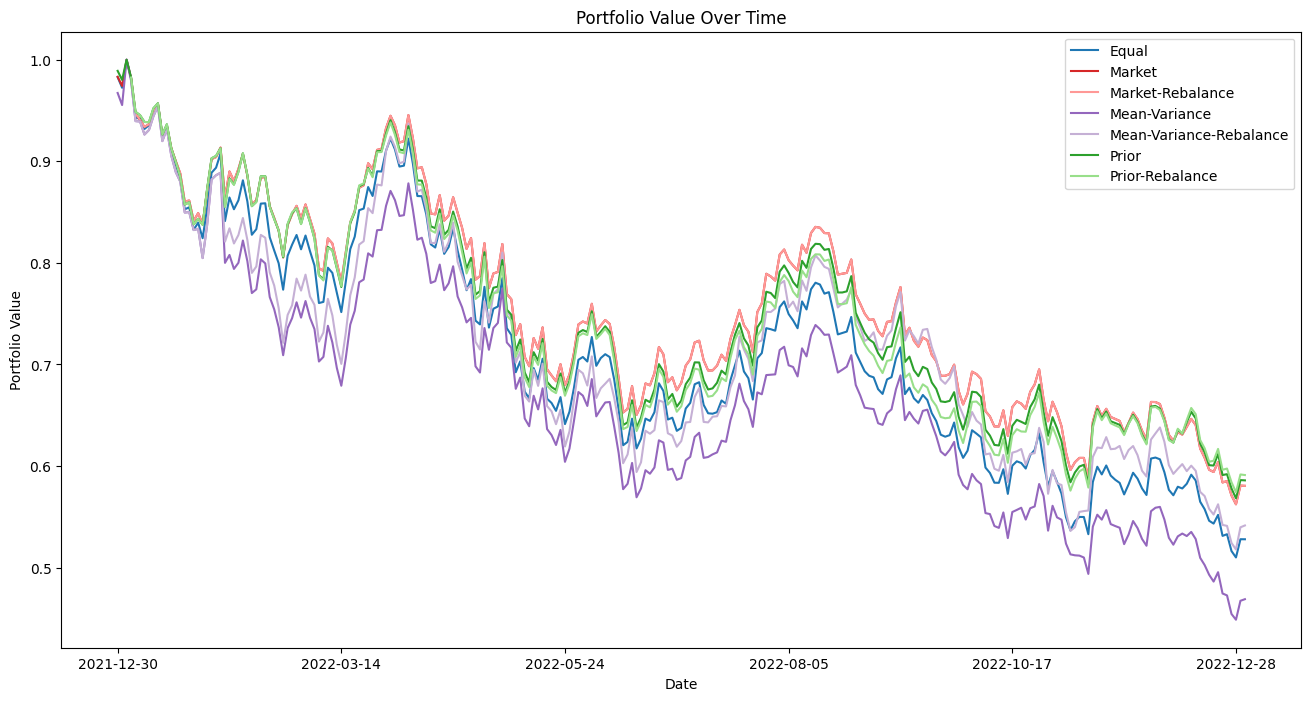

In [12]:
dfPortfolio, dfholdings = simulateRebalance(tickers, numRebalances=12, endDate="2023-01-01")

In [13]:
bullTest = PerformanceTest(
    startDate="2019-01-01", 
    endDate="2025-01-01",
    riskFreeRate=0.03
    )

In [14]:
bullTest = PerformanceTest(
    startDate="2019-01-01", 
    endDate="2025-01-01",
    riskFreeRate=0.03
    )

bullResults = bullTest.flow(
    numberOfIterations=1000,
    minNumberOfStock=5,
    maxNumberOfStock=10,
)
bullResults = bullResults.sort_index()

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


In [15]:
bullResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].describe()

,EqualSharpeRatio,MarketSharpeRatio,MeanVarSharpeRatio,PriorSharpeRatio,PosteriorSharpeRatioOne
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.842310,0.767428,0.546788,0.719518,1.025723
std,0.749206,0.894543,0.893959,1.001466,1.086904
min,-1.053342,-1.246067,-1.254139,-1.145336,-1.223446
25%,0.305822,0.138145,-0.105258,0.020406,0.394996
50%,0.783020,0.689108,0.469720,0.624016,0.856852
75%,1.305608,1.264242,1.092242,1.251893,1.536900
max,3.569814,4.811932,3.566011,5.937140,8.610755


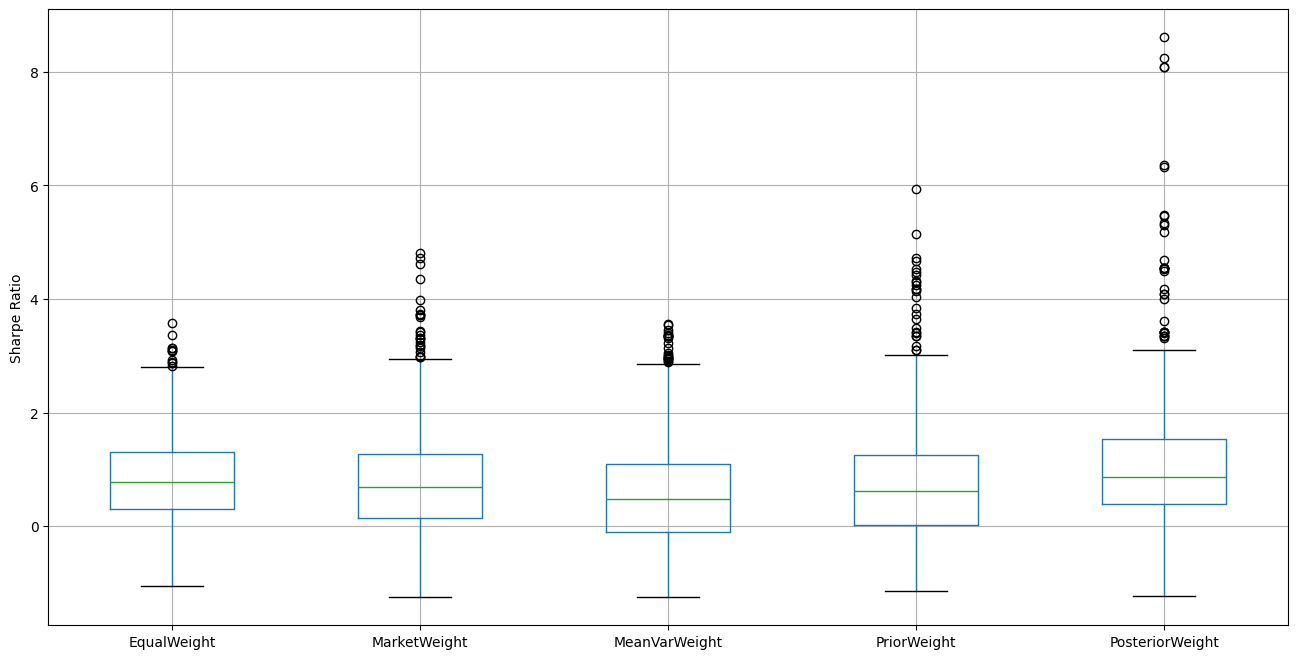

In [21]:
# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = bullResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].quantile(0.05)
# Q3 = bullResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].quantile(0.95)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# filtered_results = bullResults[~((bullResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]] < lower_bound) | (bullResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]] > upper_bound)).any(axis=1)]

# Plot the boxplot without outliers
mapping = {
    "EqualSharpeRatio": "EqualWeight", 
    "MarketSharpeRatio": "MarketWeight", 
    "MeanVarSharpeRatio": "MeanVarWeight", 
    "PriorSharpeRatio": "PriorWeight", 
    "PosteriorSharpeRatioOne": "PosteriorWeight"
}
df_renamed = bullResults[list(mapping.keys())].rename(columns=mapping)
df_renamed.boxplot(figsize=(16, 8))
plt.ylabel("Sharpe Ratio")
plt.show()

In [17]:
bearTest = PerformanceTest(
    startDate="2017-01-01", 
    endDate="2023-01-01",
    riskFreeRate=0.03
    )

bearResults = bearTest.flow(
    numberOfIterations=1000,
    minNumberOfStock=5,
    maxNumberOfStock=10,
)
bearResults = bearResults.sort_index()

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

c:\Users\phoom\Desktop\Senior Project\backend\.venv\Lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.
ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp

In [18]:
bearResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].describe()

,EqualSharpeRatio,MarketSharpeRatio,MeanVarSharpeRatio,PriorSharpeRatio,PosteriorSharpeRatioOne
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.463179,-0.317510,-0.574648,-0.214286,0.084352
std,0.414247,0.538766,0.446630,0.615859,0.667108
min,-1.287860,-1.328004,-1.343465,-1.310713,-1.291770
25%,-0.751552,-0.707914,-0.877894,-0.663292,-0.456092
50%,-0.527856,-0.413793,-0.654422,-0.355135,0.097289
75%,-0.228803,-0.035224,-0.382243,0.147463,0.558238
max,1.103222,1.958716,1.672091,2.831835,2.445789


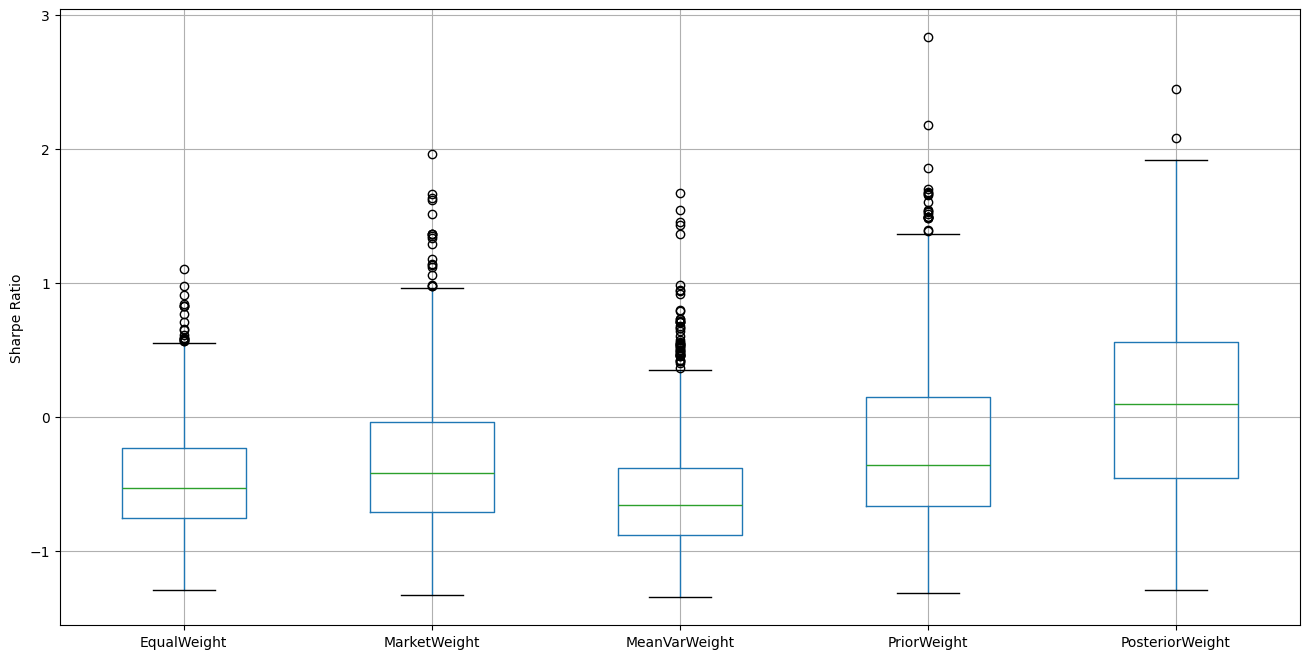

In [22]:
# # Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = bearResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].quantile(0.05)
# Q3 = bearResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]].quantile(0.95)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# filtered_results = bearResults[~((bearResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]] < lower_bound) | (bearResults[["EqualSharpeRatio", "MarketSharpeRatio", "MeanVarSharpeRatio", "PriorSharpeRatio", "PosteriorSharpeRatioOne"]] > upper_bound)).any(axis=1)]

# Plot the boxplot without outliers
mapping = {
    "EqualSharpeRatio": "EqualWeight", 
    "MarketSharpeRatio": "MarketWeight", 
    "MeanVarSharpeRatio": "MeanVarWeight", 
    "PriorSharpeRatio": "PriorWeight", 
    "PosteriorSharpeRatioOne": "PosteriorWeight"
}
df_renamed = bearResults[list(mapping.keys())].rename(columns=mapping)
df_renamed.boxplot(figsize=(16, 8))
plt.ylabel("Sharpe Ratio")
plt.show()